In [165]:
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')

# 파일 불러오기
all = pd.read_excel("../엑셀/Join_data.xlsx", index_col = 0)    
all.drop([0], axis=0, inplace=True)

# 컬럼 추출
all2 = all[['DateTime', '종가_ex','1Y_전일비_irs', '2Y_전일비_irs', '3Y_전일비_irs',
        '5Y_전일비_irs', '10Y_전일비_irs',  '1Y_전일비_crs', '2Y_전일비_crs','3Y_전일비_crs','5Y_전일비_crs','10Y_전일비_crs',
        '국고1년', '국고3년', '국고5년','국고10년', '통안364일', '통안2년', 'Mid_ndf',
        'M1_스왑포인트']]            # [[]] 대괄호 2개 사용 -> 데이터 프레임형태로 나옴

        
all2 = all2.set_index("DateTime")


all2['대비_국고1년'] = all2['국고1년']-all2['국고1년'].shift(1)
all2['대비_국고3년'] = all2['국고3년']-all2['국고3년'].shift(1)
all2['대비_국고5년'] = all2['국고5년']-all2['국고5년'].shift(1)
all2['대비_국고10년'] = all2['국고10년']-all2['국고10년'].shift(1)
all2['대비_통안1년'] = all2['통안364일']-all2['통안364일'].shift(1)
all2['대비_통안2년'] = all2['통안364일']-all2['통안364일'].shift(1)
all2['대비_ndf'] = all2['Mid_ndf']-all2['Mid_ndf'].shift(1)
all2['스왑포인트_1월물'] = all2["M1_스왑포인트"]/100 
all2['전일종가_ex'] = all2['종가_ex'].shift(1)

all2.rename({"1Y_전일비_irs" : "1Y_대비_irs", "2Y_전일비_irs" : "2Y_대비_irs", "3Y_전일비_irs" : "3Y_대비_irs", "5Y_전일비_irs" : "5Y_대비_irs", "10Y_전일비_irs" : "10Y_대비_irs",
            "1Y_전일비_crs" : "1Y_대비_crs", "2Y_전일비_crs" : "2Y_대비_crs", "3Y_전일비_crs" : "3Y_대비_crs", "5Y_전일비_crs" : "5Y_대비_crs", "10Y_전일비_crs" : "10Y_대비_crs"}, axis=1, inplace=True)

all2 = all2.dropna()

# 필요 칼럼만 남기기
df = all2.copy()
df = all2[["종가_ex", 
            '1Y_대비_irs', '2Y_대비_irs', '3Y_대비_irs', '5Y_대비_irs', '10Y_대비_irs', 
            '1Y_대비_crs', '2Y_대비_crs', '3Y_대비_crs', '5Y_대비_crs', '10Y_대비_crs', 
            "대비_국고1년", "대비_국고3년", "대비_국고5년", "대비_국고10년", "대비_통안1년", "대비_통안2년",
            "대비_ndf", "스왑포인트_1월물", "전일종가_ex"]] # , "전일종가_ex"

# DateTime을 인덱스로 바꿔주기
df

,종가_ex,1Y_대비_irs,2Y_대비_irs,3Y_대비_irs,5Y_대비_irs,10Y_대비_irs,1Y_대비_crs,2Y_대비_crs,3Y_대비_crs,5Y_대비_crs,10Y_대비_crs,대비_국고1년,대비_국고3년,대비_국고5년,대비_국고10년,대비_통안1년,대비_통안2년,대비_ndf,스왑포인트_1월물,전일종가_ex
DateTime,,,,,,,,,,,,,,,,,,,,
2012-08-03,1134.8,-0.03,-0.03,-0.03,-0.03,-0.02,-0.01,-0.015,-0.02,-0.08,-0.15,-0.02,-0.02,-0.07,-0.07,-0.02,-0.02,4.00,2.40,1131.7
2012-08-06,1129.0,0.02,0.02,0.02,0.02,0.01,0.00,-0.025,-0.03,-0.04,-0.04,0.01,0.01,0.00,0.00,0.01,0.01,-9.50,2.40,1134.8
2012-08-07,1128.8,0.01,0.00,0.00,0.01,0.02,0.02,0.015,0.00,-0.07,-0.08,-0.01,0.00,0.00,0.00,-0.01,-0.01,0.50,2.50,1129.0
2012-08-08,1128.3,0.01,0.02,0.02,0.02,0.03,0.01,0.000,0.00,-0.02,-0.04,-0.01,-0.02,-0.02,-0.02,-0.01,-0.01,1.25,2.40,1128.8
2012-08-09,1125.5,0.05,0.06,0.06,0.05,0.04,0.09,0.040,0.04,0.04,0.04,0.05,0.06,0.05,0.05,0.04,0.04,2.25,2.35,1128.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-25,1313.7,-0.04,-0.08,-0.07,-0.09,-0.11,-0.08,-0.090,-0.07,-0.11,-0.11,-0.02,-0.06,-0.07,-0.09,-0.01,-0.01,3.35,-0.60,1313.0
2022-07-26,1307.6,-0.01,-0.02,-0.03,-0.03,-0.03,0.01,-0.030,-0.03,-0.02,-0.02,0.01,-0.03,-0.02,-0.03,0.01,0.01,1.15,-0.70,1313.7
2022-07-27,1313.3,-0.01,-0.05,-0.06,-0.06,-0.06,0.01,-0.010,-0.01,-0.01,-0.01,0.00,-0.03,-0.05,-0.06,0.02,0.02,-0.50,-0.55,1307.6


<AxesSubplot:>

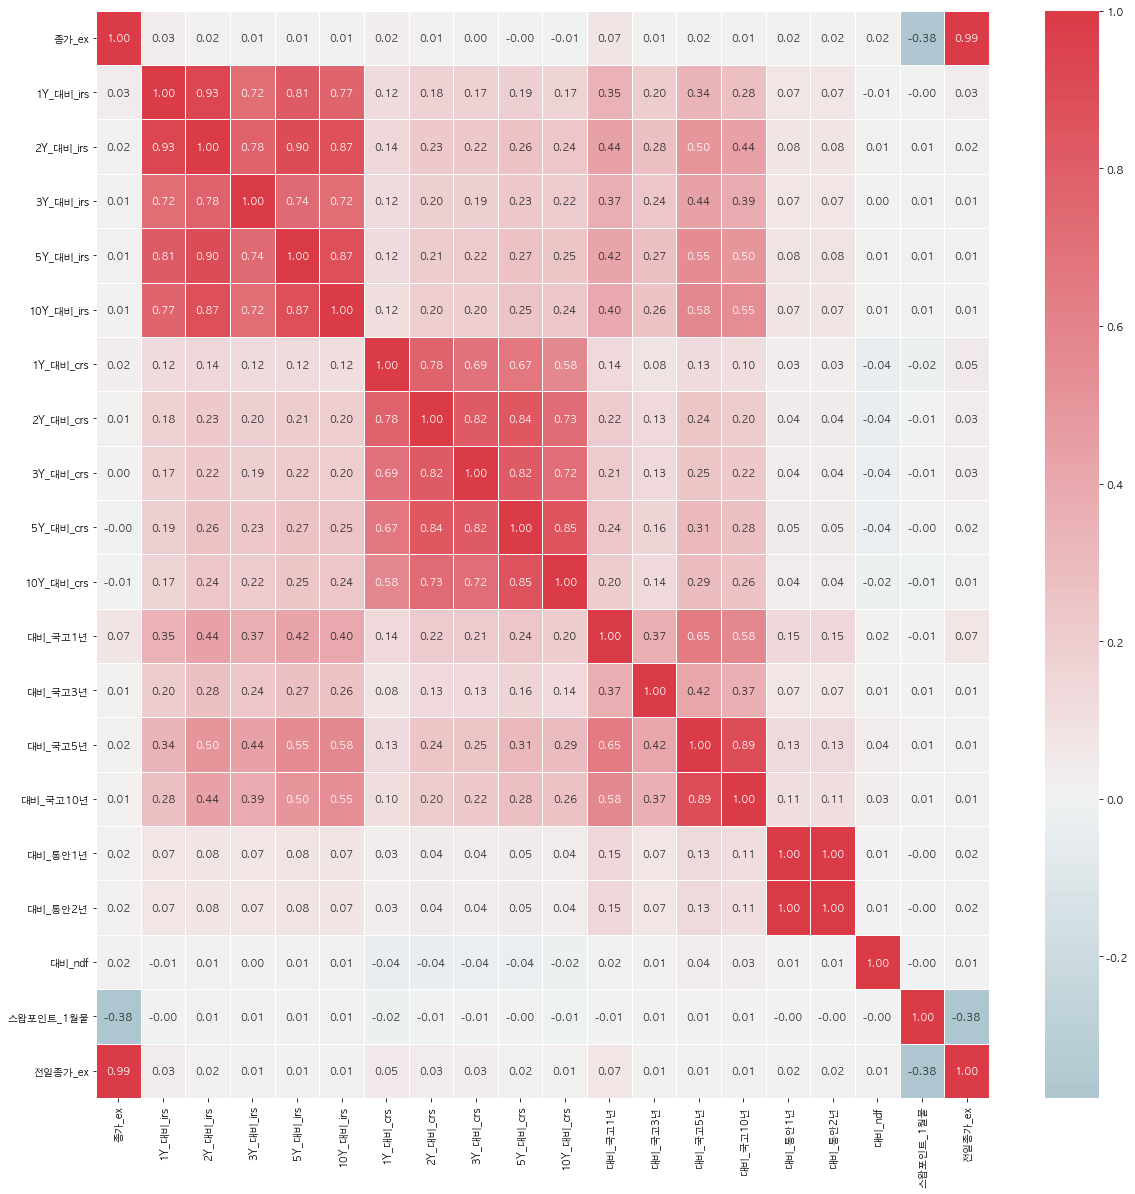

In [166]:
import matplotlib.pyplot as plt
import seaborn as sns   
import scipy as sp  
from matplotlib import rc 
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(20,20))

cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(data = df.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap=cmap, center=0)

In [145]:
from sklearn.preprocessing import StandardScaler

x = df[['1Y_대비_irs', '2Y_대비_irs', '3Y_대비_irs', '5Y_대비_irs', '10Y_대비_irs', 
          '1Y_대비_crs', '2Y_대비_crs', '3Y_대비_crs', '5Y_대비_crs', '10Y_대비_crs', 
          "대비_국고1년", "대비_국고3년", "대비_국고5년", "대비_국고10년", "대비_통안1년", "대비_통안2년",
           "대비_ndf", "스왑포인트_1월물", "전일종가_ex"]] # , "전일종가_ex"
y = df[["종가_ex"]]
x.feature = x.columns 

# StandardScaler객체 생성
scaler = StandardScaler()

# MinMaxScaler 로 데이터 셋 변환. fit() 과 transform() 호출.
scaler.fit(x)
data_scaled = scaler.transform(x)

# transform()시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
x_scaled = pd.DataFrame(data = data_scaled, columns=x.feature)
x_scaled.index = y.index # 인덱스가 달라서 똑같이 설정
x_scaled

,1Y_대비_irs,2Y_대비_irs,3Y_대비_irs,5Y_대비_irs,10Y_대비_irs,1Y_대비_crs,2Y_대비_crs,3Y_대비_crs,5Y_대비_crs,10Y_대비_crs,대비_국고1년,대비_국고3년,대비_국고5년,대비_국고10년,대비_통안1년,대비_통안2년,대비_ndf,스왑포인트_1월물,전일종가_ex
DateTime,,,,,,,,,,,,,,,,,,,
2012-08-03,-0.848159,-0.732099,-0.562745,-0.628439,-0.403644,-0.205698,-0.364180,-0.462791,-1.872418,-3.115253,-1.133777,-0.324094,-1.890723,-1.798842,-0.217667,-0.217667,0.184967,1.820638,-0.056282
2012-08-06,0.559997,0.481892,0.370922,0.415773,0.202253,-0.003456,-0.602348,-0.690892,-0.939341,-0.833148,0.563092,0.159979,0.000440,-0.000209,0.107313,0.107313,-0.449739,1.820638,-0.000487
2012-08-07,0.278366,-0.003704,-0.002545,0.206931,0.404219,0.401029,0.350324,-0.006589,-1.639149,-1.663004,-0.568154,-0.001379,0.000440,-0.000209,-0.109340,-0.109340,0.020414,1.911215,-0.104877
2012-08-08,0.278366,0.481892,0.370922,0.415773,0.606184,0.198787,-0.006928,-0.006589,-0.472802,-0.833148,-0.568154,-0.324094,-0.539892,-0.514104,-0.109340,-0.109340,0.055675,1.820638,-0.108476
2012-08-09,1.404890,1.453085,1.117855,1.042301,0.808150,1.816727,0.945744,0.905815,0.926814,0.826565,2.825583,0.966767,1.351270,1.284529,0.432293,0.432293,0.102691,1.775350,-0.117475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-25,-1.129790,-1.946090,-1.309678,-1.881494,-2.221333,-1.621396,-2.150439,-1.603295,-2.572226,-2.285397,-1.133777,-0.969524,-1.890723,-2.312737,-0.109340,-0.109340,0.154407,-0.896666,3.206786
2022-07-26,-0.284897,-0.489301,-0.562745,-0.628439,-0.605609,0.198787,-0.721432,-0.690892,-0.472802,-0.418220,0.563092,-0.485451,-0.539892,-0.771052,0.107313,0.107313,0.050974,-0.987243,3.219385
2022-07-27,-0.284897,-1.217695,-1.122944,-1.254966,-1.211506,0.198787,-0.245096,-0.234690,-0.239533,-0.210756,-0.002531,-0.485451,-1.350390,-1.541894,0.215640,0.215640,-0.026602,-0.851378,3.109596


<AxesSubplot:>

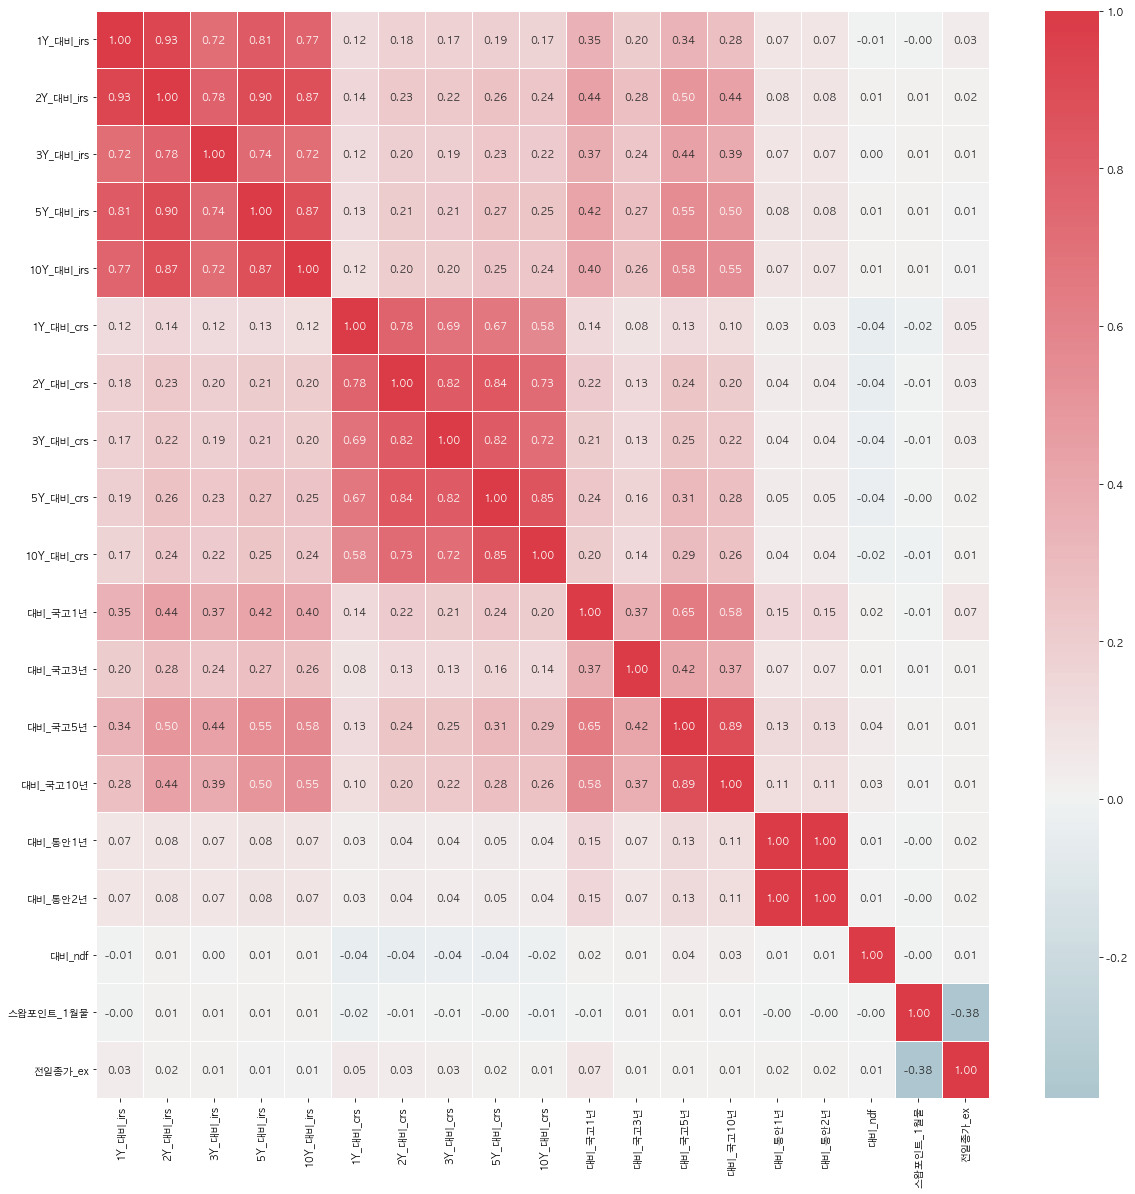

In [146]:
import matplotlib.pyplot as plt
import seaborn as sns   
import scipy as sp  
from matplotlib import rc 
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(20,20))

cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(data = x_scaled.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap=cmap, center=0)

In [147]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X_train = x_scaled

def feature_engineering_XbyVIF(X_train):
    vif = pd.DataFrame()
    vif["VIF_Factor"] = [variance_inflation_factor(X_train.values,i)
                         for i in range(X_train.shape[1])]
    vif["Feature"] = X_train.columns
    return vif
vif = feature_engineering_XbyVIF(X_train)
print(vif)

    VIF_Factor     Feature
0     9.980583   1Y_대비_irs
1    19.526734   2Y_대비_irs
2     2.661401   3Y_대비_irs
3     6.466959   5Y_대비_irs
4     5.869349  10Y_대비_irs
5     2.654026   1Y_대비_crs
6     5.264648   2Y_대비_crs
7     3.829576   3Y_대비_crs
8     6.698569   5Y_대비_crs
9     3.716935  10Y_대비_crs
10    1.895499     대비_국고1년
11    1.252804     대비_국고3년
12    6.217594     대비_국고5년
13    5.051566    대비_국고10년
14         inf     대비_통안1년
15         inf     대비_통안2년
16    1.007475      대비_ndf
17    1.169313   스왑포인트_1월물
18    1.181985     전일종가_ex


In [148]:
import statsmodels.api as sm

feature_add = sm.add_constant(x_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  종가_ex   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 1.420e+04
Date:                Thu, 25 Aug 2022   Prob (F-statistic):               0.00
Time:                        16:28:40   Log-Likelihood:                -7638.3
No. Observations:                2458   AIC:                         1.531e+04
Df Residuals:                    2439   BIC:                         1.542e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1134.8952      0.110   1.04e+04      0.000    1134.680    1135.110
1Y_대비_irs      0.1717      0.346      0.496      0.620      -0.507       0.851
2Y_대비_irs      0.5303      0.484      1.095      0.274      -0.419       1.480
3Y_대비_irs      0.0114      0.179      0.064      0.949      -0.339       0.362
5Y_대비_irs     -0.2653      0.279     -0.952      0.341      -0.812       0.281
10Y_대비_irs    -0.5234      0.265     -1.972      0.049      -1.044      -0.003
1Y_대비_crs     -1.0741      0.179     -6.016      0.000      -1.424      -0.724
2Y_대비_crs     -0.2523      0.251     -1.003      0.316      -0.745       0.241
3Y_대비_crs     -0.4315      0.214     -2.012      0.044      -0.852      -0.011
5Y_대비_crs     -0.1715      0.284     -0.605      0.545      -0.728       0.385
10Y_대비_crs     0.1796      0.211      0.850      0.395      -0.235       0.594
대비_국고1년        0.1173      0.151      0.777      0.437      -0.179       0.413
대비_국고3년       -0.2696      0.123     -2.198      0.028      -0.510      -0.029
대비_국고5년        1.0262      0.273      3.756      0.000       0.490       1.562
대비_국고10년      -0.2582      0.246     -1.048      0.295      -0.741       0.225
대비_통안1년       -0.0021      0.055     -0.037      0.970      -0.111       0.107
대비_통안2년       -0.0021      0.055     -0.037      0.970      -0.111       0.107
대비_ndf         0.5269      0.110      4.790      0.000       0.311       0.743
스왑포인트_1월물     -0.1473      0.118     -1.243      0.214      -0.380       0.085
전일종가_ex       55.3585      0.119    464.671      0.000      55.125      55.592
==============================================================================
Omnibus:                       39.083   Durbin-Watson:                   2.134
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               73.574
Skew:                          -0.024   Prob(JB):                     1.06e-16
Kurtosis:                       3.846   Cond. No.                     7.93e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.45e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [149]:
x_scaled.drop(['2Y_대비_irs'], axis=1, inplace=True)

from statsmodels.stats.outliers_influence import variance_inflation_factor
X_train = x_scaled
def feature_engineering_XbyVIF(X_train):
    vif = pd.DataFrame()
    vif["VIF_Factor"] = [variance_inflation_factor(X_train.values,i)
                         for i in range(X_train.shape[1])]
    vif["Feature"] = X_train.columns
    return vif
vif = feature_engineering_XbyVIF(X_train)
print(vif)

    VIF_Factor     Feature
0     3.927737   1Y_대비_irs
1     2.550716   3Y_대비_irs
2     5.800865   5Y_대비_irs
3     5.215736  10Y_대비_irs
4     2.651142   1Y_대비_crs
5     5.253275   2Y_대비_crs
6     3.827100   3Y_대비_crs
7     6.692814   5Y_대비_crs
8     3.716810  10Y_대비_crs
9     1.883691     대비_국고1년
10    1.246693     대비_국고3년
11    6.128450     대비_국고5년
12    5.037604    대비_국고10년
13         inf     대비_통안1년
14         inf     대비_통안2년
15    1.005205      대비_ndf
16    1.169251   스왑포인트_1월물
17    1.181196     전일종가_ex


In [150]:
x_scaled.drop(['대비_통안2년'], axis=1, inplace=True)

from statsmodels.stats.outliers_influence import variance_inflation_factor
X_train = x_scaled
def feature_engineering_XbyVIF(X_train):
    vif = pd.DataFrame()
    vif["VIF_Factor"] = [variance_inflation_factor(X_train.values,i)
                         for i in range(X_train.shape[1])]
    vif["Feature"] = X_train.columns
    return vif
vif = feature_engineering_XbyVIF(X_train)
print(vif)

    VIF_Factor     Feature
0     3.927737   1Y_대비_irs
1     2.550716   3Y_대비_irs
2     5.800865   5Y_대비_irs
3     5.215736  10Y_대비_irs
4     2.651142   1Y_대비_crs
5     5.253275   2Y_대비_crs
6     3.827100   3Y_대비_crs
7     6.692814   5Y_대비_crs
8     3.716810  10Y_대비_crs
9     1.883691     대비_국고1년
10    1.246693     대비_국고3년
11    6.128450     대비_국고5년
12    5.037604    대비_국고10년
13    1.024763     대비_통안1년
14    1.005205      대비_ndf
15    1.169251   스왑포인트_1월물
16    1.181196     전일종가_ex


In [151]:
import statsmodels.api as sm

feature_add = sm.add_constant(x_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  종가_ex   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 1.503e+04
Date:                Thu, 25 Aug 2022   Prob (F-statistic):               0.00
Time:                        16:28:41   Log-Likelihood:                -7638.9
No. Observations:                2458   AIC:                         1.531e+04
Df Residuals:                    2440   BIC:                         1.542e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1134.8952      0.110   1.04e+04      0.000    1134.680    1135.110
1Y_대비_irs      0.4669      0.217      2.150      0.032       0.041       0.893
3Y_대비_irs      0.0513      0.175      0.293      0.769      -0.292       0.394
5Y_대비_irs     -0.1674      0.264     -0.634      0.526      -0.685       0.350
10Y_대비_irs    -0.4264      0.250     -1.704      0.089      -0.917       0.064
1Y_대비_crs     -1.0805      0.178     -6.056      0.000      -1.430      -0.731
2Y_대비_crs     -0.2395      0.251     -0.954      0.340      -0.732       0.253
3Y_대비_crs     -0.4375      0.214     -2.041      0.041      -0.858      -0.017
5Y_대비_crs     -0.1624      0.284     -0.573      0.567      -0.718       0.394
10Y_대비_crs     0.1810      0.211      0.857      0.392      -0.233       0.595
대비_국고1년        0.1303      0.150      0.866      0.386      -0.165       0.425
대비_국고3년       -0.2602      0.122     -2.126      0.034      -0.500      -0.020
대비_국고5년        1.0621      0.271      3.915      0.000       0.530       1.594
대비_국고10년      -0.2724      0.246     -1.107      0.268      -0.755       0.210
대비_통안1년       -0.0064      0.111     -0.058      0.954      -0.224       0.211
대비_ndf         0.5326      0.110      4.847      0.000       0.317       0.748
스왑포인트_1월물     -0.1463      0.118     -1.235      0.217      -0.379       0.086
전일종가_ex       55.3551      0.119    464.779      0.000      55.122      55.589
==============================================================================
Omnibus:                       38.662   Durbin-Watson:                   2.134
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               72.559
Skew:                          -0.021   Prob(JB):                     1.75e-16
Kurtosis:                       3.841   Cond. No.                         7.49
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [152]:
x_scaled.drop(['3Y_대비_irs', '5Y_대비_crs', '대비_통안1년'], axis=1, inplace=True)

from statsmodels.stats.outliers_influence import variance_inflation_factor
X_train = x_scaled
def feature_engineering_XbyVIF(X_train):
    vif = pd.DataFrame()
    vif["VIF_Factor"] = [variance_inflation_factor(X_train.values,i)
                         for i in range(X_train.shape[1])]
    vif["Feature"] = X_train.columns
    return vif
vif = feature_engineering_XbyVIF(X_train)
print(vif)

    VIF_Factor     Feature
0     3.607527   1Y_대비_irs
1     5.674036   5Y_대비_irs
2     5.095327  10Y_대비_irs
3     2.649262   1Y_대비_crs
4     4.562587   2Y_대비_crs
5     3.453024   3Y_대비_crs
6     2.432943  10Y_대비_crs
7     1.868259     대비_국고1년
8     1.245697     대비_국고3년
9     6.113844     대비_국고5년
10    5.037071    대비_국고10년
11    1.004797      대비_ndf
12    1.169230   스왑포인트_1월물
13    1.180825     전일종가_ex


In [153]:
import statsmodels.api as sm

feature_add = sm.add_constant(x_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  종가_ex   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 1.827e+04
Date:                Thu, 25 Aug 2022   Prob (F-statistic):               0.00
Time:                        16:28:41   Log-Likelihood:                -7639.1
No. Observations:                2458   AIC:                         1.531e+04
Df Residuals:                    2443   BIC:                         1.540e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1134.8952      0.110   1.04e+04      0.000    1134.680    1135.110
1Y_대비_irs      0.4902      0.208      2.356      0.019       0.082       0.898
5Y_대비_irs     -0.1610      0.261     -0.617      0.537      -0.673       0.351
10Y_대비_irs    -0.4189      0.247     -1.694      0.090      -0.904       0.066
1Y_대비_crs     -1.0808      0.178     -6.062      0.000      -1.430      -0.731
2Y_대비_crs     -0.2899      0.234     -1.239      0.215      -0.749       0.169
3Y_대비_crs     -0.4764      0.204     -2.341      0.019      -0.876      -0.077
10Y_대비_crs     0.1115      0.171      0.653      0.514      -0.224       0.446
대비_국고1년        0.1314      0.150      0.878      0.380      -0.162       0.425
대비_국고3년       -0.2605      0.122     -2.131      0.033      -0.500      -0.021
대비_국고5년        1.0578      0.271      3.906      0.000       0.527       1.589
대비_국고10년      -0.2712      0.246     -1.103      0.270      -0.753       0.211
대비_ndf         0.5338      0.110      4.862      0.000       0.319       0.749
스왑포인트_1월물     -0.1464      0.118     -1.236      0.216      -0.379       0.086
전일종가_ex       55.3553      0.119    465.101      0.000      55.122      55.589
==============================================================================
Omnibus:                       38.563   Durbin-Watson:                   2.133
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               72.315
Skew:                          -0.021   Prob(JB):                     1.98e-16
Kurtosis:                       3.839   Cond. No.                         6.85
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [154]:
x_scaled.drop(['10Y_대비_crs', '5Y_대비_irs', '스왑포인트_1월물'], axis=1, inplace=True)

from statsmodels.stats.outliers_influence import variance_inflation_factor
X_train = x_scaled
def feature_engineering_XbyVIF(X_train):
    vif = pd.DataFrame()
    vif["VIF_Factor"] = [variance_inflation_factor(X_train.values,i)
                         for i in range(X_train.shape[1])]
    vif["Feature"] = X_train.columns
    return vif
vif = feature_engineering_XbyVIF(X_train)
print(vif)

    VIF_Factor     Feature
0     2.799522   1Y_대비_irs
1     3.616374  10Y_대비_irs
2     2.646122   1Y_대비_crs
3     4.164614   2Y_대비_crs
4     3.139949   3Y_대비_crs
5     1.863349     대비_국고1년
6     1.244634     대비_국고3년
7     6.044507     대비_국고5년
8     5.035128    대비_국고10년
9     1.004576      대비_ndf
10    1.010550     전일종가_ex


In [155]:
import statsmodels.api as sm

feature_add = sm.add_constant(x_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  종가_ex   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 2.326e+04
Date:                Thu, 25 Aug 2022   Prob (F-statistic):               0.00
Time:                        16:28:41   Log-Likelihood:                -7640.2
No. Observations:                2458   AIC:                         1.530e+04
Df Residuals:                    2446   BIC:                         1.537e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1134.8952      0.110   1.04e+04      0.000    1134.680    1135.110
1Y_대비_irs      0.4243      0.183      2.316      0.021       0.065       0.784
10Y_대비_irs    -0.4931      0.208     -2.368      0.018      -0.902      -0.085
1Y_대비_crs     -1.0762      0.178     -6.041      0.000      -1.426      -0.727
2Y_대비_crs     -0.2486      0.223     -1.112      0.266      -0.687       0.190
3Y_대비_crs     -0.4384      0.194     -2.259      0.024      -0.819      -0.058
대비_국고1년        0.1231      0.149      0.824      0.410      -0.170       0.416
대비_국고3년       -0.2626      0.122     -2.149      0.032      -0.502      -0.023
대비_국고5년        1.0492      0.269      3.897      0.000       0.521       1.577
대비_국고10년      -0.2688      0.246     -1.094      0.274      -0.751       0.213
대비_ndf         0.5345      0.110      4.870      0.000       0.319       0.750
전일종가_ex       55.4113      0.110    503.338      0.000      55.195      55.627
==============================================================================
Omnibus:                       39.211   Durbin-Watson:                   2.135
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               73.952
Skew:                          -0.023   Prob(JB):                     8.74e-17
Kurtosis:                       3.849   Cond. No.                         6.14
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [156]:
x_scaled.drop(['2Y_대비_crs'], axis=1, inplace=True)

feature_add = sm.add_constant(x_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  종가_ex   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 2.559e+04
Date:                Thu, 25 Aug 2022   Prob (F-statistic):               0.00
Time:                        16:28:41   Log-Likelihood:                -7640.9
No. Observations:                2458   AIC:                         1.530e+04
Df Residuals:                    2447   BIC:                         1.537e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1134.8952      0.110   1.04e+04      0.000    1134.680    1135.110
1Y_대비_irs      0.4225      0.183      2.306      0.021       0.063       0.782
10Y_대비_irs    -0.4962      0.208     -2.383      0.017      -0.905      -0.088
1Y_대비_crs     -1.1786      0.153     -7.729      0.000      -1.478      -0.880
3Y_대비_crs     -0.5665      0.156     -3.627      0.000      -0.873      -0.260
대비_국고1년        0.1196      0.149      0.800      0.424      -0.173       0.413
대비_국고3년       -0.2641      0.122     -2.162      0.031      -0.504      -0.025
대비_국고5년        1.0350      0.269      3.848      0.000       0.508       1.562
대비_국고10년      -0.2639      0.246     -1.074      0.283      -0.746       0.218
대비_ndf         0.5361      0.110      4.885      0.000       0.321       0.751
전일종가_ex       55.4117      0.110    503.319      0.000      55.196      55.628
==============================================================================
Omnibus:                       39.801   Durbin-Watson:                   2.133
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               75.623
Skew:                          -0.019   Prob(JB):                     3.79e-17
Kurtosis:                       3.858   Cond. No.                         5.93
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [157]:
x_scaled.drop(['대비_국고3년'], axis=1, inplace=True)

feature_add = sm.add_constant(x_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  종가_ex   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 2.838e+04
Date:                Thu, 25 Aug 2022   Prob (F-statistic):               0.00
Time:                        16:28:41   Log-Likelihood:                -7643.2
No. Observations:                2458   AIC:                         1.531e+04
Df Residuals:                    2448   BIC:                         1.536e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1134.8952      0.110   1.04e+04      0.000    1134.680    1135.110
1Y_대비_irs      0.4051      0.183      2.211      0.027       0.046       0.764
10Y_대비_irs    -0.4867      0.208     -2.336      0.020      -0.895      -0.078
1Y_대비_crs     -1.1806      0.153     -7.736      0.000      -1.480      -0.881
3Y_대비_crs     -0.5695      0.156     -3.643      0.000      -0.876      -0.263
대비_국고1년        0.0774      0.148      0.522      0.602      -0.213       0.368
대비_국고5년        0.9475      0.266      3.561      0.000       0.426       1.469
대비_국고10년      -0.2578      0.246     -1.049      0.294      -0.740       0.224
대비_ndf         0.5364      0.110      4.883      0.000       0.321       0.752
전일종가_ex       55.4132      0.110    502.967      0.000      55.197      55.629
==============================================================================
Omnibus:                       40.125   Durbin-Watson:                   2.137
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               76.266
Skew:                          -0.026   Prob(JB):                     2.75e-17
Kurtosis:                       3.861   Cond. No.                         5.72
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [158]:
x_scaled.drop(['대비_국고1년'], axis=1, inplace=True)

feature_add = sm.add_constant(x_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  종가_ex   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 3.194e+04
Date:                Thu, 25 Aug 2022   Prob (F-statistic):               0.00
Time:                        16:28:41   Log-Likelihood:                -7643.3
No. Observations:                2458   AIC:                         1.530e+04
Df Residuals:                    2449   BIC:                         1.536e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1134.8952      0.110   1.04e+04      0.000    1134.680    1135.110
1Y_대비_irs      0.4249      0.179      2.372      0.018       0.074       0.776
10Y_대비_irs    -0.5009      0.207     -2.425      0.015      -0.906      -0.096
1Y_대비_crs     -1.1784      0.153     -7.725      0.000      -1.478      -0.879
3Y_대비_crs     -0.5680      0.156     -3.635      0.000      -0.874      -0.262
대비_국고5년        0.9950      0.250      3.980      0.000       0.505       1.485
대비_국고10년      -0.2540      0.246     -1.034      0.301      -0.736       0.228
대비_ndf         0.5362      0.110      4.882      0.000       0.321       0.752
전일종가_ex       55.4176      0.110    504.504      0.000      55.202      55.633
==============================================================================
Omnibus:                       39.762   Durbin-Watson:                   2.137
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               75.208
Skew:                          -0.028   Prob(JB):                     4.66e-17
Kurtosis:                       3.855   Cond. No.                         5.23
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [159]:
import numpy as np 
# import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.3, random_state=10)
from sklearn.linear_model import LinearRegression

mlr = LinearRegression()
mlr.fit(x_train, y_train)

y_pred = mlr.predict(x_test)

from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test,y_pred)

print('MSE : {0:}, RMSE : {1: .3f}, MAE:{1: .3f}'.format(mse, rmse, mae))
print('Variance score : {0: .3f}'.format(r2_score(y_test, y_pred)))


MSE : 28.60047422532831, RMSE :  5.348, MAE: 5.348
Variance score :  0.990


In [160]:
from sklearn.model_selection import cross_val_score
neg_mse_scores = cross_val_score(mlr, x_scaled, y,scoring="neg_mean_squared_error", cv = 5)
rmse_scores = np.sqrt(-1 *neg_mse_scores)
avg_rmse = np.mean(rmse_scores)
avg_rmse,rmse_scores, neg_mse_scores

(8.058857841848958,
 array([ 4.12573393,  6.73264744,  5.68240397, 18.61938042,  5.13412345]),
 array([ -17.02168043,  -45.32854153,  -32.28971484, -346.68132735,
         -26.35922365]))